In [1]:
import pandas as pd
import glob
import os
import gc
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import classification_report

def get_data_frame(path):
    f = os.path.join(str(path))
    dfs = pd.read_csv(f).dropna() # Загрузка с удалением пустых строк и столбцов
    dfs["BMI"] = dfs["weight"] / (dfs["height"]**2)
    return dfs[['weight', 'height', 'BMI', 'gender']].sample(frac=1)
    
def training_logistic_regression_model(all_input_data, all_output, test_size):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(all_input_data, all_output, test_size = test_size)
    model = linear_model.LogisticRegression()
    model.fit(X_train, Y_train)
    return model, X_test, Y_test

def get_my_sex(model, myW, myH, myBMI):
    mysex=model.predict([[myW, myH, myBMI]])
    return ("Female" if mysex[0] == 0 else "Male")
    
def show_data_model_info(model, X_test, Y_test):
    Y_test_predicted = model.predict(X_test)
    [tn, fp], [fn, tp] = confusion_matrix(Y_test, Y_test_predicted)
    print(confusion_matrix(Y_test, Y_test_predicted))
    precision = tp / (tp + fp)
    recall = tp / tp + fn
    report = classification_report(Y_test, model.predict(X_test), target_names=['Male', 'Female'])
    print(report)
    return precision, recall
    

PATH_DATA = "../DataForTrainingTasks/athletes_sochi.txt"
GENDER = "Male"
myH=1.65 # Рост
myW=75 # Вес 
myBMI=myW/(myH**2) # Индекс BMI
test_size = 0.25

alldata = get_data_frame(PATH_DATA)
print(alldata)

allinput = alldata[ ['weight', 'height', 'BMI'] ]
alloutput = alldata["gender"].apply(lambda x: int(x == GENDER))

print(allinput)
print(alloutput)

model, X_test, Y_test = training_logistic_regression_model(allinput, alloutput, test_size)

print(get_my_sex(model, myH, myW, myBMI))
print(show_data_model_info(model, X_test, Y_test))

      weight  height        BMI  gender
352     53.0    1.57  21.501886  Female
1711    79.0    1.80  24.382716    Male
2587    64.0    1.75  20.897959    Male
1320    80.0    1.80  24.691358    Male
964     70.0    1.76  22.598140    Male
...      ...     ...        ...     ...
486     59.0    1.62  22.481329  Female
546     61.0    1.65  22.405877    Male
1788    68.0    1.73  22.720438    Male
2685    65.0    1.68  23.030045  Female
2341    45.0    1.63  16.937032  Female

[2479 rows x 4 columns]
      weight  height        BMI
352     53.0    1.57  21.501886
1711    79.0    1.80  24.382716
2587    64.0    1.75  20.897959
1320    80.0    1.80  24.691358
964     70.0    1.76  22.598140
...      ...     ...        ...
486     59.0    1.62  22.481329
546     61.0    1.65  22.405877
1788    68.0    1.73  22.720438
2685    65.0    1.68  23.030045
2341    45.0    1.63  16.937032

[2479 rows x 3 columns]
352     0
1711    1
2587    1
1320    1
964     1
       ..
486     0
546     1
1788  

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


   Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1
0    1880
1     120
Name: Cluster, dtype: int64


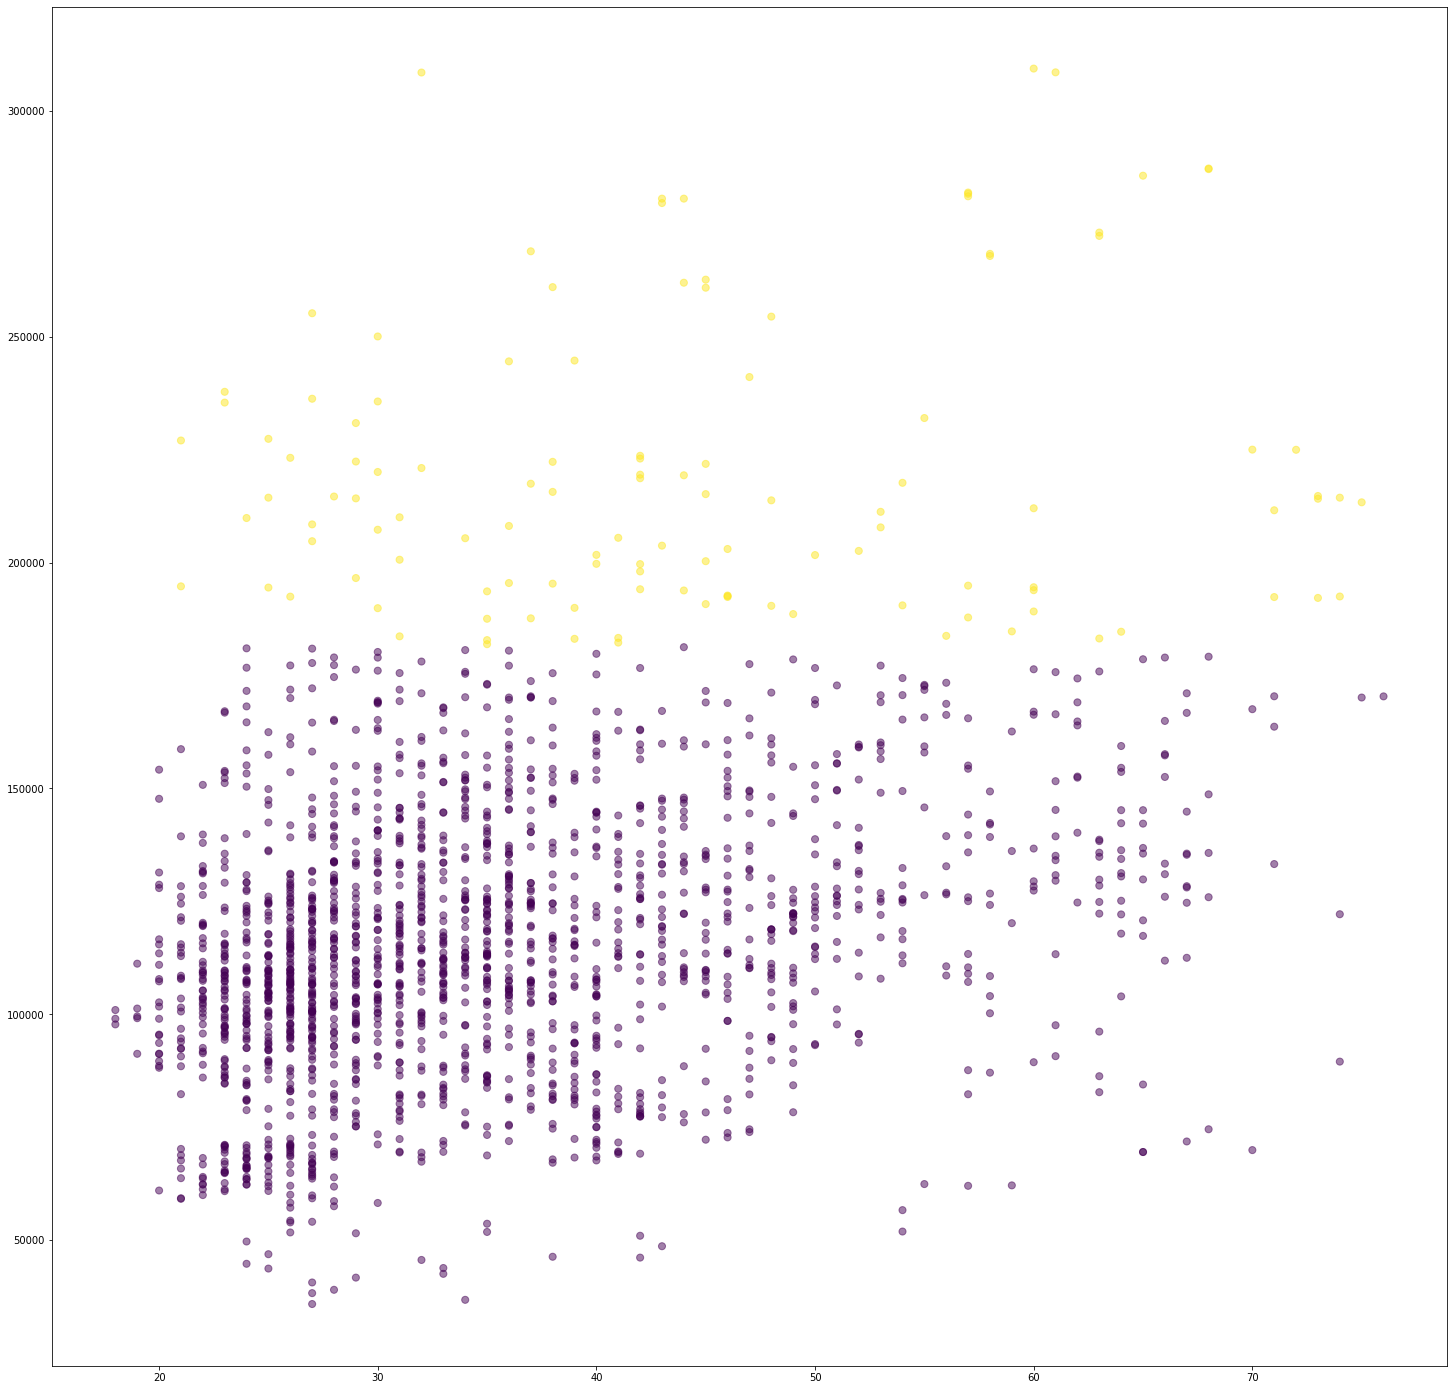

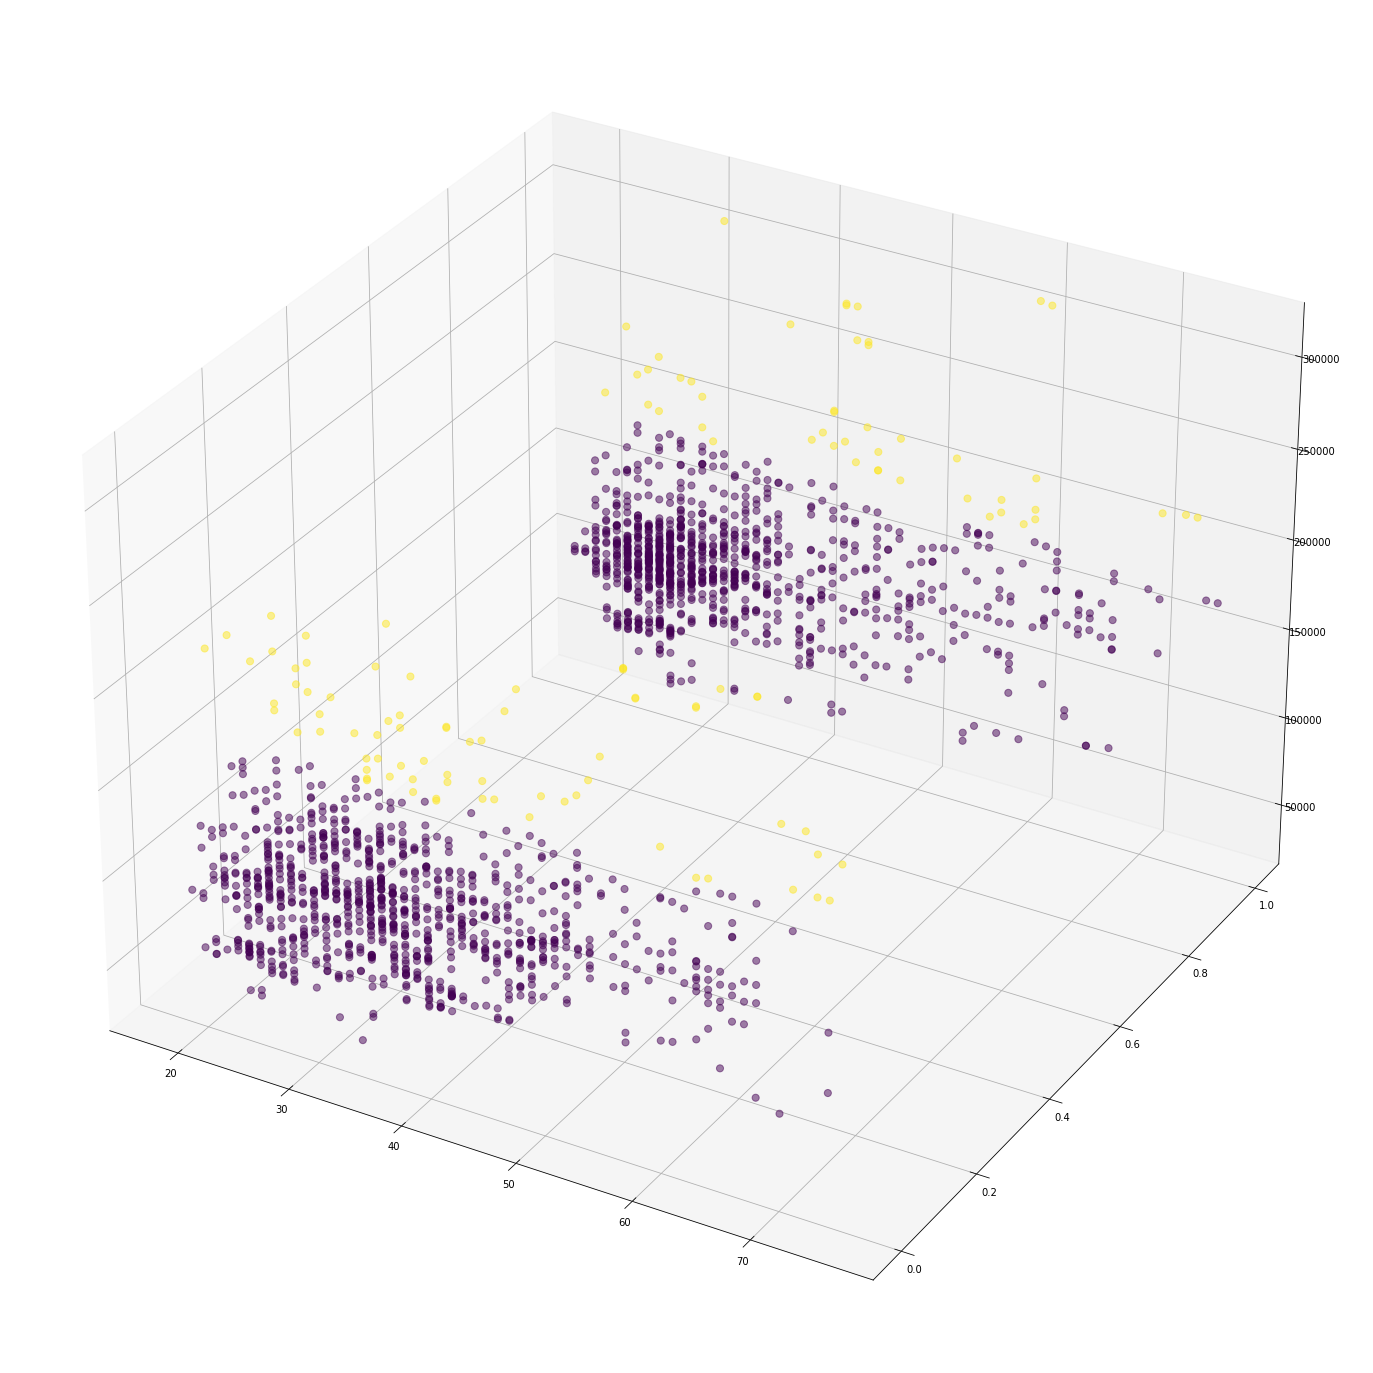

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing

# Source dataset: https://www.kaggle.com/dev0914sharma/customer-clustering?select=segmentation+data.csv 

def load_data(data_path):
    f = os.path.join(str(data_path))
    df = pd.read_csv(f).dropna()
    df.drop_duplicates(subset=['ID'])
    if {'ID'}.issubset(df.columns):
        df.drop(['ID'], axis=1, inplace=True)
    print(df.head())
    return df

def meanshift_execute(data_frame, bandwidth = 0, max_iter = 300, quantile=0.3):
    data_list = data_frame.values.tolist()
    if bandwidth == 0 or bandwidth < 0: 
        bandwidth = estimate_bandwidth(data_list, quantile=quantile)
    meanshift_clusters = MeanShift(bandwidth = bandwidth, cluster_all=True, max_iter = max_iter).fit(data_list) 
    return meanshift_clusters

def clusters_show(data_frame):
    plt.figure(figsize=(25, 25))
    plt.scatter(data_frame['Age'], data_frame['Income'], c=data_frame['Cluster'], s=50, alpha=0.5)
    plt.show()

def clusters_show3d(data_frame):
    fig = plt.figure(figsize=(25, 25))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(data_frame['Age'], data_frame['Marital status'], data_frame['Income'], c=data_frame['Cluster'], s=50, alpha=0.5)
    plt.show()

    
PATH_DATA = "../DataForTrainingTasks/segmentation_data.csv"
df = load_data(PATH_DATA)
meanshift_clusters = meanshift_execute(df, 0, 300)
df['Cluster'] = meanshift_clusters.labels_
print(df['Cluster'].value_counts())
clusters_show(df)
clusters_show3d(df)